### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

### **Import Required Libraries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### **Data Loading and Data Understanding**

**1. Read in the `coupons.csv` file.**

In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


**2. Investigate the dataset for missing or problematic data.**

A diagnostic assessment of the dataset was conducted by focusing the examination on the following key areas -
1. Structural and Content Review
2. Statistical Profiling
3. Shape Verification
4. Duplicate Detection
5. Missing Value Analysis

In [5]:
# Structure and Content Review
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
# Statistical Profiling
print(f"Statistical Summary of all columns: {data.describe(include='all')}")

Statistical Summary of all columns:             destination passanger weather   temperature   time        coupon  \
count             12684     12684   12684  12684.000000  12684         12684   
unique                3         4       3           NaN      5             5   
top     No Urgent Place     Alone   Sunny           NaN    6PM  Coffee House   
freq               6283      7305   10069           NaN   3230          3996   
mean                NaN       NaN     NaN     63.301798    NaN           NaN   
std                 NaN       NaN     NaN     19.154486    NaN           NaN   
min                 NaN       NaN     NaN     30.000000    NaN           NaN   
25%                 NaN       NaN     NaN     55.000000    NaN           NaN   
50%                 NaN       NaN     NaN     80.000000    NaN           NaN   
75%                 NaN       NaN     NaN     80.000000    NaN           NaN   
max                 NaN       NaN     NaN     80.000000    NaN           NaN   

   

In [7]:
# describe columns - Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50) 
data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].describe(include='all') 

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12577,12467,12533,12554,12495
unique,5,5,5,5,5
top,never,less1,1~3,1~3,less1
freq,5197,3385,4672,5376,6077


In [8]:
# Shape Verification
print(f"Number of rows and columns: {data.shape}")

Number of rows and columns: (12684, 26)


In [9]:
# Duplicate Detection
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}") 

Number of duplicate rows: 74


In [10]:
# Missing Value Analysis
nan_info = pd.DataFrame({
    'num_nan_values': data.isna().sum(),
    'percent_nan_values': data.isna().mean() * 100
})
print(f"Missing Value Analysis :\n{nan_info[nan_info['num_nan_values'] > 0]}")

Missing Value Analysis :
                      num_nan_values  percent_nan_values
car                            12576           99.148534
Bar                              107            0.843582
CoffeeHouse                      217            1.710817
CarryAway                        151            1.190476
RestaurantLessThan20             130            1.024913
Restaurant20To50                 189            1.490066


In [11]:
# display count and percentage of rows with Nan values excluding column 'car'
nan_rows = data.drop(columns=['car']).isna().any(axis=1)
num_nan_rows = nan_rows.sum()
percent_nan_rows = (num_nan_rows / len(data)) * 100
print(f"Number of rows with NaN values (excluding 'car'): {num_nan_rows}")
print(f"Percentage of rows with NaN values (excluding 'car'): {percent_nan_rows:.2f}%")

Number of rows with NaN values (excluding 'car'): 605
Percentage of rows with NaN values (excluding 'car'): 4.77%


**Findings:** 
 - Dataset Size: 12684 rows , 26 columns
 - There are 74 Duplicate rows in the Dataset
 - Data is missing mostly in the 'car' column : 99.1% missing data
 - Other columns with missing data are venue-frequency columns (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50) : Less than 2% in each column

### **Data Preparation**

**3. Decide what to do about your missing data -- drop, replace, other...**

The following data preprocessing steps were executed to produce a reliable, clean dataset for subsequent analysis
1. Deduplication
2. Missing Values Remediation
3. Refined Dataset Export

In [12]:
# Delete the 74 duplicate rows but keep the first occurrence
data = data.drop_duplicates(keep='first') 
# Shape of the data after removing duplicates
data.shape

(12610, 26)

In [13]:
# Dropping column 'car' justified by high percentage of missing values (99%)
data = data.drop(columns=['car'])
# Print shape after dropping 'car' column
print(f"Number of rows and columns after dropping 'car' column: {data.shape}") 
# Re-evaluate Missing Value Analysis after dropping 'car' column
nan_info = pd.DataFrame({
    'num_nan_values': data.isna().sum(),
    'percent_nan_values': data.isna().mean() * 100
})  
print(f"Missing Value Analysis after dropping 'car' column: \n {nan_info[nan_info['num_nan_values'] > 0]}")

Number of rows and columns after dropping 'car' column: (12610, 25)
Missing Value Analysis after dropping 'car' column: 
                       num_nan_values  percent_nan_values
Bar                              107            0.848533
CoffeeHouse                      217            1.720856
CarryAway                        150            1.189532
RestaurantLessThan20             129            1.022998
Restaurant20To50                 189            1.498810


In [14]:
# Updated total count and percentage of rows with nan values in any column
num_rows_with_nan = data.isna().any(axis=1).sum()
percent_rows_with_nan = (num_rows_with_nan / data.shape[0]) * 100
print(f"Number of rows with NaN values: {num_rows_with_nan}")
print(f"Percentage of rows with NaN values: {percent_rows_with_nan:.2f}%")  # The percentage of rows with NaN values

Number of rows with NaN values: 603
Percentage of rows with NaN values: 4.78%


In [15]:
# Since the percentage of total rows with NaN values is low (less than 5%), we will proceed with dropping rows containing NaN values. 
data = data.dropna()
# Final shape after dropping rows with NaN values
print(f"Number of rows and columns after dropping rows with NaN values: {data.shape}")

Number of rows and columns after dropping rows with NaN values: (12007, 25)


In [16]:
# Export the cleaned data to a new CSV file
data.to_csv('data/coupons_cleaned.csv', index=False)

**Findings:** 
- Initial Size of the dataset: 12,684 rows and 26 columns.
- Data Cleaning Performed: 
    - Removed 74 duplicate rows.
    - Dropped the 'car' column because ~99% of its values were missing.
    - Dropped remaining rows with missing values (<5%), producing a cleaned dataset saved as data/coupons_cleaned.csv
        - Few venue-frequency columns had small amounts of missing data (<2%) before dropping rows.
- Update Size of the dataset: 12,007 rows and 25 columns.
- Cleaned dataset is ready for subsequent analysis.

### **Coupon Acceptance Analysis**

**4. What proportion of the total observations chose to accept the coupon?**



To address this question, the following visualizations were created to illustrate the proportion of values in column Y, presented in both actual count and as percentage.

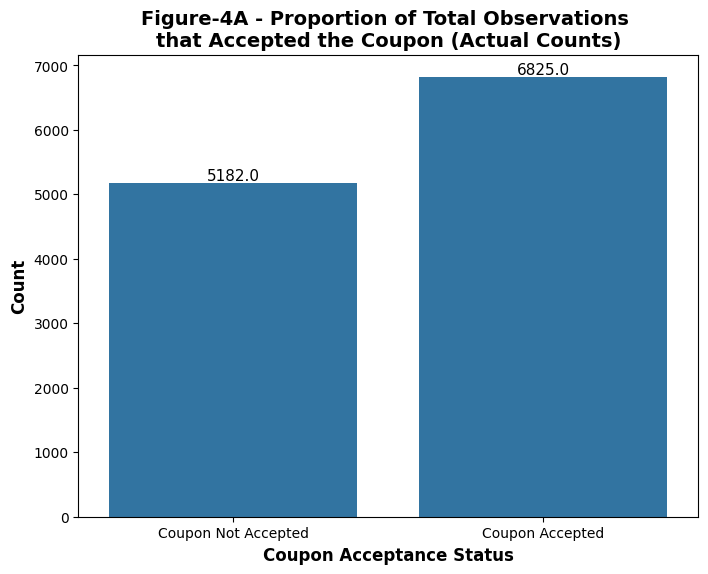

In [23]:
# Plot to visualize the proportion of column Y with values 0 and 1.
plt.figure(figsize=(8,6))
sns.countplot(x='Y', data=data)
plt.title('Figure-4A - Proportion of Total Observations \nthat Accepted the Coupon (Actual Counts)', fontweight='bold', fontsize=14)
plt.xlabel('Coupon Acceptance Status', fontweight='bold', fontsize=12)
plt.ylabel('Count', fontweight='bold', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Coupon Not Accepted', 'Coupon Accepted'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.savefig('images/Figure-4A.png')
plt.show()

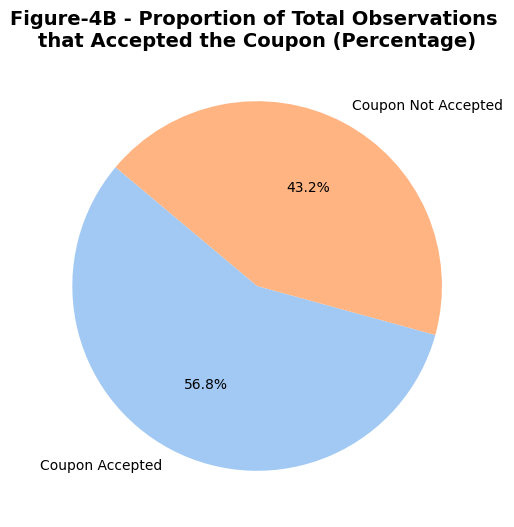

In [24]:
# Plot to visualize the proportion of column Y with values 0 and 1 as a percentage.
y_counts = data['Y'].value_counts(normalize=True) * 100
plt.figure(figsize=(8,6))
colors = sns.color_palette('pastel')[0:2]
plt.pie(y_counts, labels=['Coupon Accepted', 'Coupon Not Accepted'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Figure-4B - Proportion of Total Observations \nthat Accepted the Coupon (Percentage)', fontweight='bold', fontsize=14)
plt.savefig('images//Figure-4B.png')
plt.show()

**Findings:** 
- Figure-4A and Figure-4B show that a majority of the observations accepted the coupon.
- 56.8% (6,825 out of 12,007) accepted vs 43.2% (5,182 out of 12,007) who did not - This shows an acceptance lead of 13.6%. 
- Coupons are more likely to be accepted than rejected. Further subgroup analysis is needed to identify the factors that lead to coupon acceptance.

**5. Use a bar plot to visualize the `coupon` column.**

The following visualizations characterize the 'coupon' column. 
- Figure-5A depicts the frequency for each coupon type
- Figure-5B delineates the coupon acceptance status counts for all coupon types. 

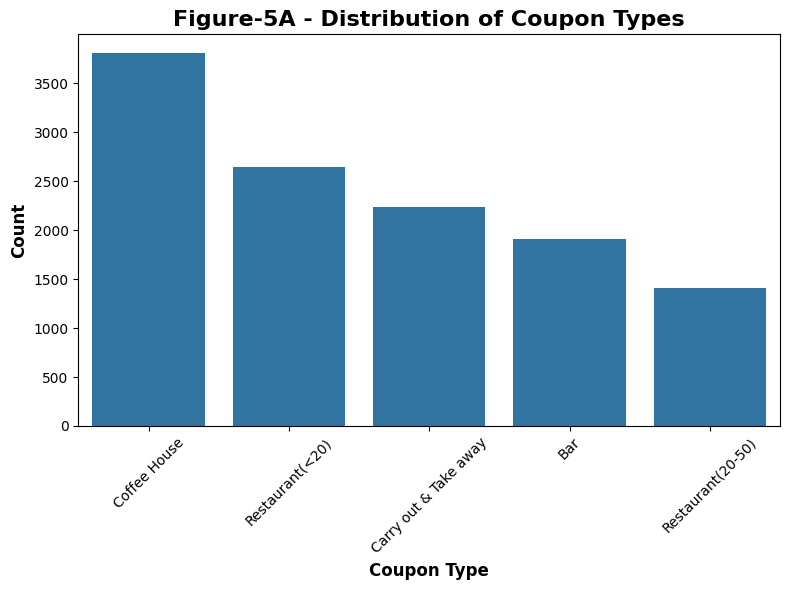

In [25]:
# Bar plot to visualize the coupon column distribution
plt.figure(figsize=(8,6))
sns.countplot(x='coupon', data=data, order=data['coupon'].value_counts().index)
plt.title('Figure-5A - Distribution of Coupon Types', fontsize=16, fontweight='bold')
plt.xlabel('Coupon Type', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks
plt.yticks
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.savefig('images/Figure-5A.png')
plt.show()

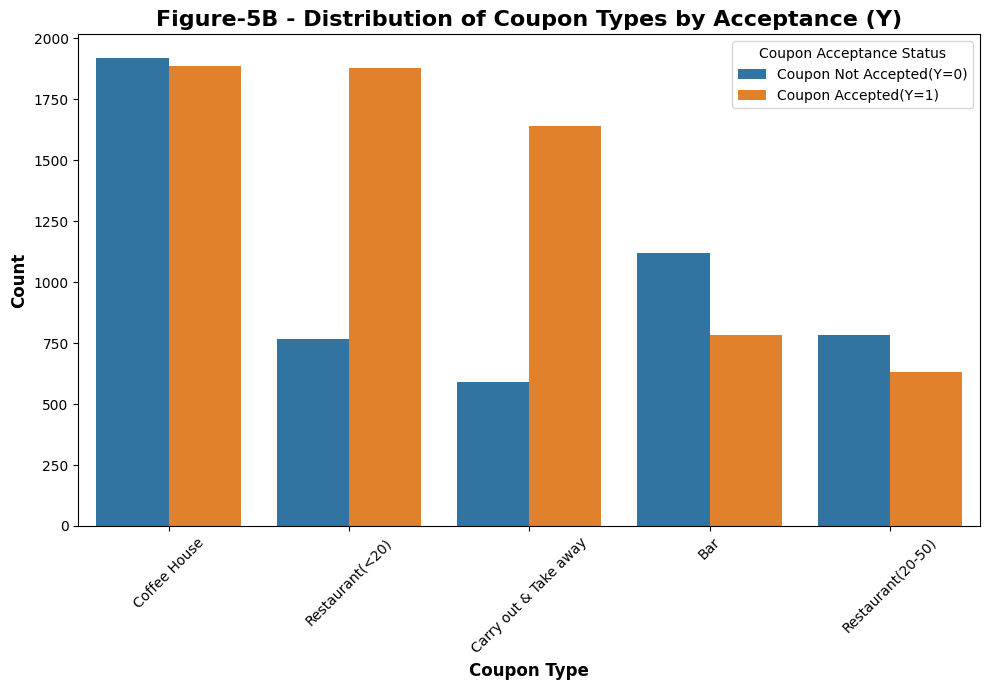

In [26]:
# Bar plot to visualize the coupon column distribution for each acceptance value of column Y (0 and 1)
plt.figure(figsize=(10,7))
sns.countplot(x='coupon', hue='Y', data=data, order=data['coupon'].value_counts().index)
plt.title('Figure-5B - Distribution of Coupon Types by Acceptance (Y)', fontsize=16, fontweight='bold')
plt.xlabel('Coupon Type', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.legend(title='Coupon Acceptance Status', labels=['Coupon Not Accepted(Y=0)', 'Coupon Accepted(Y=1)'])
plt.xticks(rotation=45)
plt.tight_layout()  
plt.savefig('images/Figure-5B.png')
plt.show()

**Findings:** 

Figure-5A:
- Coupon Types are not evenly distributed. Few coupon categories such as 'Coffee House', 'Restaurant(<20)' contribute to large portion of the dataset.
- So, coupon acceptance behavior analysis based on raw counts may lead to bias and therefore, frequency must be taken into account for analyzing coupon acceptance behavior.

Figure-5B:
- Some coupon types such as 'Restaurant(<20)', 'Carry out & Take away' show higher acceptance counts while few others show higher rejection counts.
- Differences in acceptance by coupon type suggest distinct customer preferences and suggest that targeted promotion strategies by coupon type can be used. 

**6. Use a histogram to visualize the temperature column.**

The following histograms characterize the ‘temperature’ column
- Figure-6A - An univariate distribution showing frequency of recorded temperature
- Figure-6B - A bivariate distribution of temperature frequency, segmented by coupon acceptance value

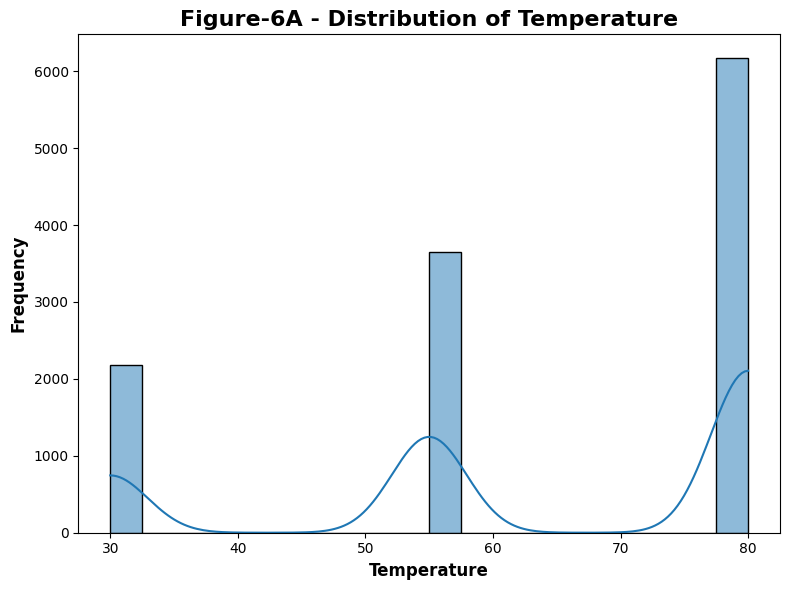

In [27]:
# Plot histogram to visualize the temperature column.
plt.figure(figsize=(8,6))
sns.histplot(data['temperature'], bins=20, kde=True)
plt.title('Figure-6A - Distribution of Temperature', fontsize=16, fontweight='bold')
plt.xlabel('Temperature', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.tight_layout()  
plt.savefig('images/Figure-6A.png')
plt.show()

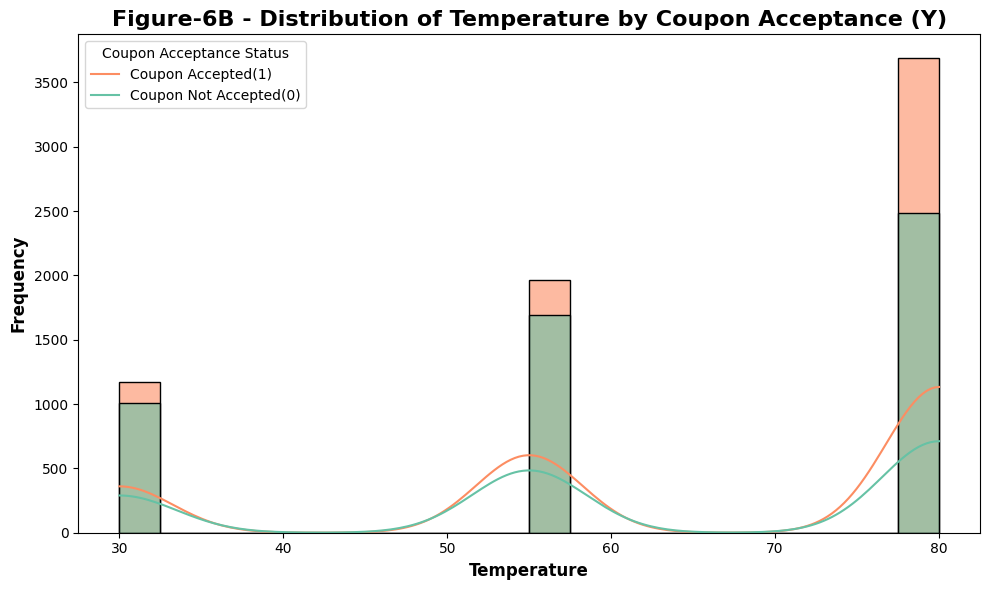

In [28]:
# Histogram to visualize the temperature distribution for each acceptance value of column Y (0 and 1)   
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='temperature', hue='Y', bins=20, kde=True, palette='Set2', alpha=0.6)
plt.title('Figure-6B - Distribution of Temperature by Coupon Acceptance (Y)', fontsize=16, fontweight='bold')
plt.xlabel('Temperature', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.legend(title='Coupon Acceptance Status', labels=['Coupon Accepted(1)', 'Coupon Not Accepted(0)'])
plt.tight_layout() 
plt.savefig('images/Figure-6B.png')
plt.show()

**Findings:** 

Figure-6A:
- The temperature data is not continuous as the histogram shows 3 peaks at 30 F, 55 F and 80 F. So, the dataset is a tri-modal and not a spread across a range.

Figure-6B:
- Segmentation by Coupon Acceptance Value shows the same 3 peaks for both coupon accepted and coupon not accepted groups. So, there is no strong visual trend to show that people accept or reject coupons at a particular temperature,
- This indicates that temperature is not a major driver for coupon acceptance

### **Bar Coupon Acceptance Analysis**
**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

**1. Create a new `DataFrame` that contains just the bar coupons.**


In [29]:
# New Dataframe, df_bar, filtered by 'Bar' coupon type in the 'coupon' column in the data DataFrame
df_bar = data[data['coupon'] == 'Bar']
# Shape of df_bar
print(f"Number of rows and columns in df_bar: {df_bar.shape}")

Number of rows and columns in df_bar: (1906, 25)


**2. What proportion of bar coupons were accepted?**


To address this question, the following visualizations were created to illustrate the proportion of bar coupon status in new dataframe, df_bar, presented in both actual count and as percentage.

Figure-Bar-2A - Shows proportion of bar coupons status, comparing the total counts of accepted coupons vs not accepted coupons

Figure-Bar-2B - Shows proportion of bar coupons status, presenting coupon acceptance rate as a percentage

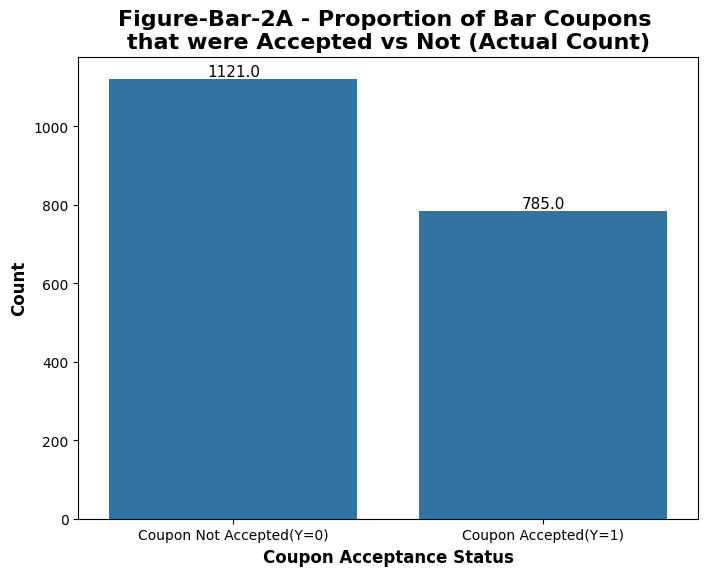

In [30]:
# Bar chart to show the proportion of Y values in the new dataframe df_bar
plt.figure(figsize=(8,6))
sns.countplot(x='Y', data=df_bar)
plt.title('Figure-Bar-2A - Proportion of Bar Coupons \nthat were Accepted vs Not (Actual Count)', fontsize=16, fontweight='bold')
plt.xlabel('Coupon Acceptance Status', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.xticks(ticks=[0, 1], labels=['Coupon Not Accepted(Y=0)', 'Coupon Accepted(Y=1)'])
plt.savefig('images/bar_coupon/Figure-Bar-2A.png')
plt.show()

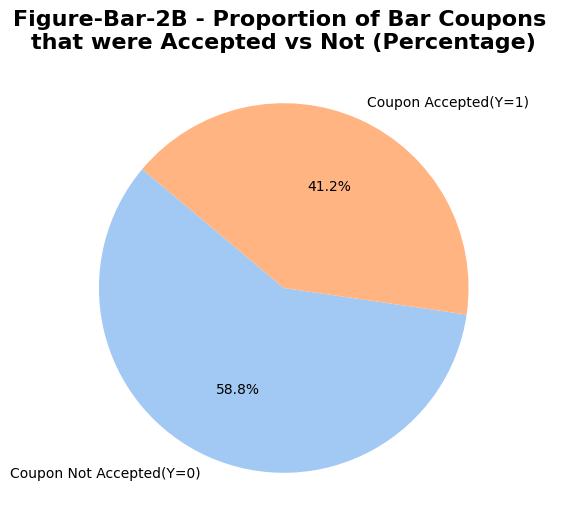

In [31]:
# Pie chart to show the proportion of Y values in the new dataframe df_bar as a percentage.
y_counts = df_bar['Y'].value_counts(normalize=True) * 100
plt.figure(figsize=(8,6))
colors = sns.color_palette('pastel')[0:2]
plt.pie(y_counts, labels=['Coupon Not Accepted(Y=0)', 'Coupon Accepted(Y=1)'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Figure-Bar-2B - Proportion of Bar Coupons \nthat were Accepted vs Not (Percentage)', fontsize=16, fontweight='bold')  
plt.savefig('images/bar_coupon/Figure-Bar-2B.png')
plt.show()

**Findings:** 
- Counts: 785 accepted vs. 1,121 not accepted (total 1,906 bar coupons).
- Percentages: 41.2% accepted and 58.8% not accepted (acceptance_percentage).
- Bar coupons are less likely to be accepted - fewer than half of the receipients redeem them.
- These findings show the need for analyzing recipients segments to identify potential demographics for targeted engagement strategies to improve acceptance rate.

**3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.**


Distinct values in 'Bar' column of df_bar: ['never' 'less1' '1~3' 'gt8' '4~8']

Group 1 (Bar Visit Frequency <= 3) - 
Coupon Acceptance Status Counts: Y
Coupon Not Accepted (Y=0)    1075
Coupon Accepted (Y=1)         638
Name: count, dtype: int64
Coupon Acceptance Percentage for Group 1 (Bar Visit Frequency <= 3) : 37.24%

Group 2 (Bar Visit Frequency > 3) - 
Coupon Acceptance Status Counts: Y
Coupon Accepted (Y=1)        147
Coupon Not Accepted (Y=0)     46
Name: count, dtype: int64
Coupon Acceptance Percentage for Group 2 (Bar Visit Frequency > 3) : 76.17%


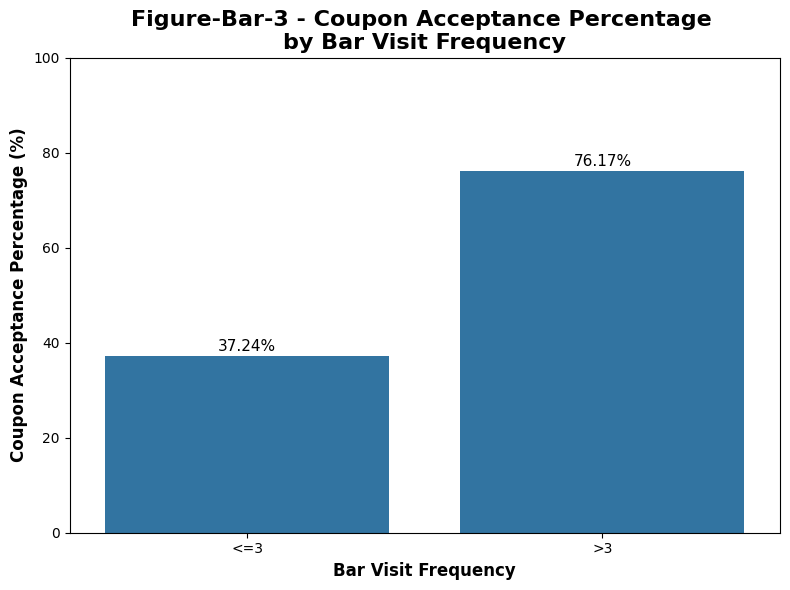

In [32]:
# Distinct values in column 'Bar' of dataframe df_bar
distinct_bar_values = df_bar['Bar'].unique()
print(f"Distinct values in 'Bar' column of df_bar: {distinct_bar_values}\n")  
# Query to calculate counts and acceptance percentage for Bar coupons for two groups. Group 1: 'Bar' == 'never'or 'less1' or '1~3', Group 2: 'Bar' = '4~8' or 'gt8'
group1 = df_bar.query("Bar in ['never', 'less1', '1~3']")
group2 = df_bar.query("Bar in ['4~8', 'gt8']")
# Calculate counts and acceptance percentages for both groups
group1_counts = group1['Y'].value_counts()
group2_counts = group2['Y'].value_counts()
group1_acceptance_percentage = (group1_counts.get(1, 0) / group1_counts.sum()) * 100
group2_acceptance_percentage = (group2_counts.get(1, 0) / group2_counts.sum()) * 100
# Print counts and acceptance percentages for both groups
group1_counts_renamed = group1_counts.rename({0: 'Coupon Not Accepted (Y=0)', 1: 'Coupon Accepted (Y=1)'})
print(f"Group 1 (Bar Visit Frequency <= 3) - \nCoupon Acceptance Status Counts: {group1_counts_renamed}\nCoupon Acceptance Percentage for Group 1 (Bar Visit Frequency <= 3) : {group1_acceptance_percentage:.2f}%")
group2_counts_renamed = group2_counts.rename({0: 'Coupon Not Accepted (Y=0)', 1: 'Coupon Accepted (Y=1)'})
print(f"\nGroup 2 (Bar Visit Frequency > 3) - \nCoupon Acceptance Status Counts: {group2_counts_renamed}\nCoupon Acceptance Percentage for Group 2 (Bar Visit Frequency > 3) : {group2_acceptance_percentage:.2f}%") 
# plot chart to compare acceptance percentages between the two groups
labels = ['<=3', '>3']
acceptance_percentages = [group1_acceptance_percentage, group2_acceptance_percentage]
plt.figure(figsize=(8,6))
sns.barplot(x=labels, y=acceptance_percentages)
plt.title('Figure-Bar-3 - Coupon Acceptance Percentage \nby Bar Visit Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Bar Visit Frequency', fontsize=12, fontweight='bold')
plt.ylabel('Coupon Acceptance Percentage (%)', fontsize=12, fontweight='bold')
for i, v in enumerate(acceptance_percentages):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=11, color='black')
plt.ylim(0, 100)
plt.tight_layout() 
plt.savefig('images/bar_coupon/Figure-Bar-3.png')
plt.show()


**Findings:** 
- Bar Visits <= 3/month: 638 of 1,713 accepted → 37.24%.
- Bar Visits > 3/month: 147 of 193 accepted → 76.17%.
- People who go to the bar more than 3 times in a month accept bar coupons at a much higher (~twice) than those who go to the bar three times or less in a month


**4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?**


Distinct values in 'Bar' column of df_bar: ['never' 'less1' '1~3' 'gt8' '4~8']
Distinct values in 'age' column of df_bar: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

Group 1 (Bar Visit >=1 and Age >25) - 
Coupon Acceptance Status Counts: Y
Coupon Accepted (Y=1)        278
Coupon Not Accepted (Y=0)    125
Name: count, dtype: int64
Coupon Acceptance Percentage for Group 1 (Bar Visit >=1 and Age >25) : 68.98%

Group 2 (All Other Bar Visitors) - 
Coupon Acceptance Status Counts: Y
Coupon Not Accepted (Y=0)    996
Coupon Accepted (Y=1)        507
Name: count, dtype: int64
Coupon Acceptance Percentage for Group 2 (All Other Bar Visitors) : 33.73%


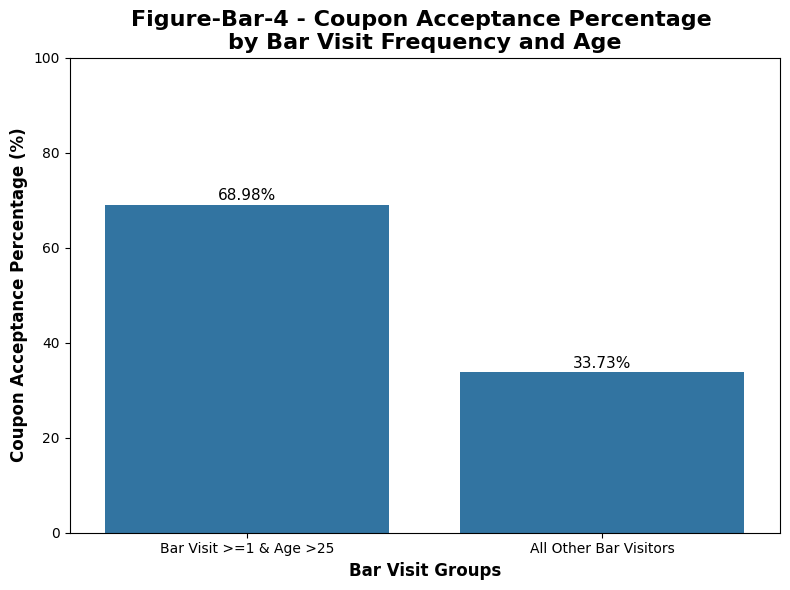

In [33]:
# Distinct values in column 'Bar' of dataframe df_bar
distinct_bar_values = df_bar['Bar'].unique()
print(f"Distinct values in 'Bar' column of df_bar: {distinct_bar_values}")
# Distinct values in age column of dataframe df_bar
distinct_age_values = df_bar['age'].unique()
print(f"Distinct values in 'age' column of df_bar: {distinct_age_values}\n")
# Two groups: Group 1: 'Bar' == '1~3', '4~8', 'gt8' and age is in '46', '26', '31', '41', '50plus', '36'. Group 2 is everything else.
group1 = df_bar.query("Bar in ['1~3', '4~8', 'gt8'] and age in ['46', '26', '31', '41', '50plus', '36']")
group2 = df_bar.drop(group1.index)
# Counts and Acceptance Percentages for both groups
group1_counts = group1['Y'].value_counts()
group2_counts = group2['Y'].value_counts()
group1_acceptance_percentage = (group1_counts.get(1, 0) / group1_counts.sum()) * 100
group2_acceptance_percentage = (group2_counts.get(1, 0) / group2_counts.sum()) * 100
# Print counts and acceptance percentages for both groups
group1_counts_renamed = group1_counts.rename({0: 'Coupon Not Accepted (Y=0)', 1: 'Coupon Accepted (Y=1)'})
print(f"Group 1 (Bar Visit >=1 and Age >25) - \nCoupon Acceptance Status Counts: {group1_counts_renamed}\nCoupon Acceptance Percentage for Group 1 (Bar Visit >=1 and Age >25) : {group1_acceptance_percentage:.2f}%")
group2_counts_renamed = group2_counts.rename({0: 'Coupon Not Accepted (Y=0)', 1: 'Coupon Accepted (Y=1)'})
print(f"\nGroup 2 (All Other Bar Visitors) - \nCoupon Acceptance Status Counts: {group2_counts_renamed}\nCoupon Acceptance Percentage for Group 2 (All Other Bar Visitors) : {group2_acceptance_percentage:.2f}%")
# plot chart to compare acceptance percentages between the two groups
labels = ['Bar Visit >=1 & Age >25', 'All Other Bar Visitors']
acceptance_percentages = [group1_acceptance_percentage, group2_acceptance_percentage]
plt.figure(figsize=(8,6))
sns.barplot(x=labels, y=acceptance_percentages)
plt.title('Figure-Bar-4 - Coupon Acceptance Percentage \nby Bar Visit Frequency and Age', fontsize=16, fontweight='bold')
plt.xlabel('Bar Visit Groups', fontsize=12, fontweight='bold')
plt.ylabel('Coupon Acceptance Percentage (%)', fontsize=12, fontweight='bold')
for i, v in enumerate(acceptance_percentages):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=11, color='black')
plt.ylim(0, 100)
plt.tight_layout() 
plt.savefig('images/bar_coupon/Figure-Bar-4.png')
plt.show()


**Findings:** 
- Group 1 (drivers who go to bars ≥1/month and are older than 25): Total Coupon Count = 403, Accepted Coupon Count = 278, Coupon Acceptance Rate = 68.98%.
- Group 2 (all other bar visitors): Total Coupon Count = 1503, Accepted Coupon Count = 507, Coupon Acceptance Rate = 33.73%.
- Coupon Acceptance Rate of Group 1 is higher than Group 2 by ~ 35.25%
- Drivers who visit the bars at least once in a month and are over 25 years old are more likely to accept the bar coupons than other bar visitors
- This suggests that the marketing efforts for bar coupons should focus on older, more frequent bar visitors to increase redemption.

**5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**


Group 1 (Bar Visit >=1, No Kids, Non-Farming Fishing & Forestry Occupation) - 
Coupon Acceptance Status Counts: Y
Coupon Accepted (Y=1)        376
Coupon Not Accepted (Y=0)    154
Name: count, dtype: int64
Coupon Acceptance Percentage for Group 1 (Bar Visit >=1, No Kids, Non-Farming Fishing & Forestry Occupation) : 70.94%

Group 2 (All Other Bar Visitors) - 
Coupon Acceptance Status Counts: Y
Coupon Not Accepted (Y=0)    967
Coupon Accepted (Y=1)        409
Name: count, dtype: int64
Coupon Acceptance Percentage for Group 2 (All Other Bar Visitors) : 29.72%



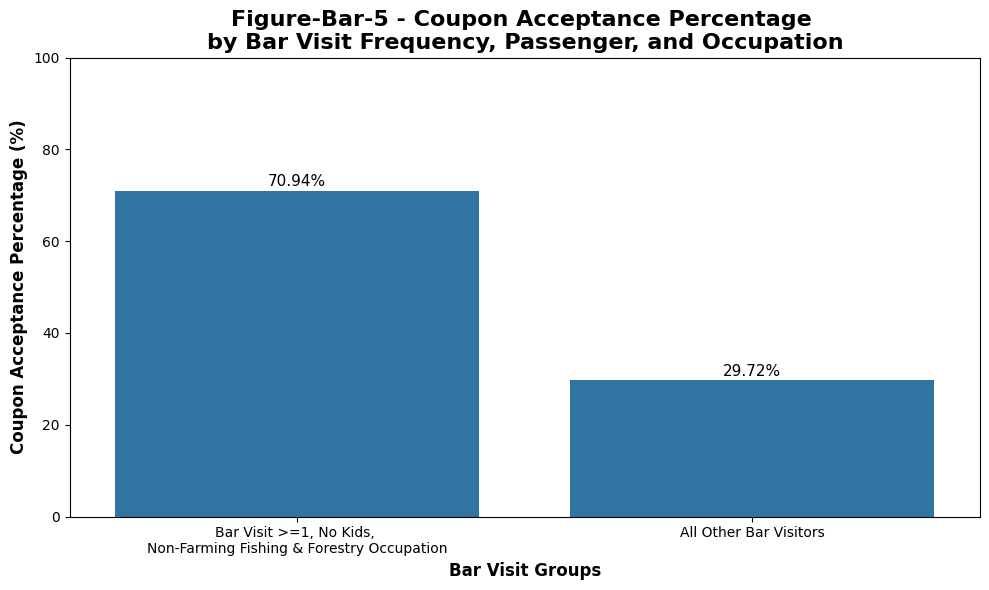

In [34]:
# All column names in df_bar
#print(f"Column names in df_bar: {df_bar.columns.tolist()}\n")
# Distinct values in column Bar in df_bar
#distinct_bar_values = df_bar['Bar'].unique()
#print(f"Distinct values in 'Bar' column of df_bar: {distinct_bar_values}\n")
# Distinct values in passanger column in df_bar
#distinct_passanger_values = df_bar['passanger'].unique()
#print(f"Distinct values in 'passanger' column of df_bar: {distinct_passanger_values}\n")
# Distinct values in occupation column in df_bar
#distinct_occupation_values = df_bar['occupation'].unique()
#print(f"Distinct values in 'occupation' column of df_bar: {distinct_occupation_values}\n")
# Two groups: Group 1: 'Bar' == '1~3', '4~8', 'gt8' and passanger != 'Kid(s)' and occupation != 'Farming Fishing & Forestry'. Group 2 is everything else.
group1 = df_bar.query("Bar in ['1~3', '4~8', 'gt8'] and passanger != 'Kid(s)' and occupation != 'Farming Fishing & Forestry'")
group2 = df_bar.drop(group1.index)
# Counts and Acceptance Percentages for both groups
group1_counts = group1['Y'].value_counts()
group2_counts = group2['Y'].value_counts()
group1_acceptance_percentage = (group1_counts.get(1, 0) / group1_counts.sum()) * 100
group2_acceptance_percentage = (group2_counts.get(1, 0) / group2_counts.sum()) * 100
# Print counts and acceptance percentages for both groups
group1_counts_renamed = group1_counts.rename({0: 'Coupon Not Accepted (Y=0)', 1: 'Coupon Accepted (Y=1)'})
print(f"Group 1 (Bar Visit >=1, No Kids, Non-Farming Fishing & Forestry Occupation) - \nCoupon Acceptance Status Counts: {group1_counts_renamed}\nCoupon Acceptance Percentage for Group 1 (Bar Visit >=1, No Kids, Non-Farming Fishing & Forestry Occupation) : {group1_acceptance_percentage:.2f}%")
group2_counts_renamed = group2_counts.rename({0: 'Coupon Not Accepted (Y=0)', 1: 'Coupon Accepted (Y=1)'})
print(f"\nGroup 2 (All Other Bar Visitors) - \nCoupon Acceptance Status Counts: {group2_counts_renamed}\nCoupon Acceptance Percentage for Group 2 (All Other Bar Visitors) : {group2_acceptance_percentage:.2f}%\n")
# Bar chart to compare acceptance percentages between the two groups
labels = ['Bar Visit >=1, No Kids, \nNon-Farming Fishing & Forestry Occupation', 'All Other Bar Visitors']
acceptance_percentages = [group1_acceptance_percentage, group2_acceptance_percentage]
plt.figure(figsize=(10,6))
sns.barplot(x=labels, y=acceptance_percentages)
plt.title('Figure-Bar-5 - Coupon Acceptance Percentage \nby Bar Visit Frequency, Passenger, and Occupation', fontsize=16, fontweight='bold')
plt.xlabel('Bar Visit Groups', fontsize=12, fontweight='bold')
plt.ylabel('Coupon Acceptance Percentage (%)', fontsize=12, fontweight='bold')
for i, v in enumerate(acceptance_percentages):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=11, color='black')
plt.ylim(0, 100)
plt.tight_layout() 
plt.savefig('images/bar_coupon/Figure-Bar-5.png')
plt.show()  


**Findings:** 
- Drivers in Group 1 who go to bars at least once a month, travel with passengers who are not kids, and work in occupations other than farming/fishing/forestry accept bar coupons at a much higher rate than other bar visitors.
- This segment, Group 1, is a strong target for bar coupon promotions - marketing aimed at Group 1 drivers is likely to yield higher redemption.


**6. Compare the acceptance rates between those drivers who:**

**- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR***

**- go to bars more than once a month and are under the age of 30 *OR***

**- go to cheap restaurants more than 4 times a month and income is less than 50K.**



The full cleaned dataset [data] was used for this comparison rather than the filtered bar coupon dataset [df_bar]. 
This ensures compliance with condition 3 in the question, which is about coupon type 'Restaurants<20' and not 'Bar'.

Condition Group [Bar>1 & No Kids & Not Widowed] or [Bar>1 & Age<30] or [Cheap Restaurant Visits>4 & Income<50k]- 
Coupon Acceptance Status Counts: Y
Coupon Accepted (Y=1)        2999
Coupon Not Accepted (Y=0)    1949
Name: count, dtype: int64
Coupon Acceptance Percentage for Condition Group [Bar>1 & No Kids & Not Widowed] or [Bar>1 & Age<30] or [Cheap Restaurant Visits>4 & Income<50k]: 60.61%

Rest of Data [Not in Condition Group]- 
Coupon Acceptance Status Counts: Y
Coupon Accepted (Y=1)        3826
Coupon Not Accepted (Y=0)    3233
Name: count, dtype: int64
Coupon Acceptance Percentage for Rest of Data [Not in Condition Group] : 54.20%



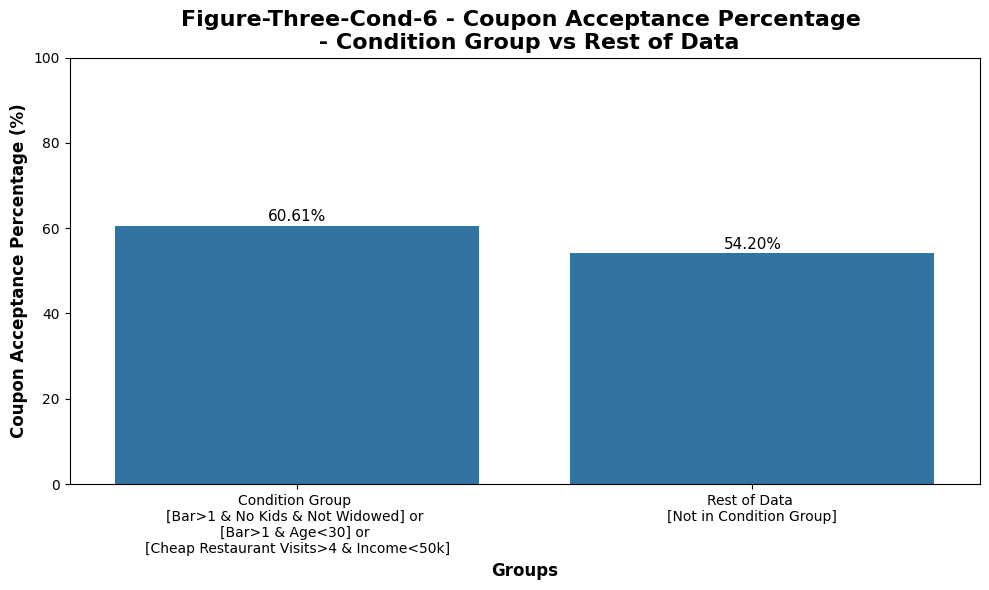

In [35]:
# copy data to a new dataframe called df_copy
df_copy = data.copy()
# Distinct values in the 'Bar' column of df_copy
#distinct_bar_values = df_copy['Bar'].unique()
#print(f"Distinct values in 'Bar' column of df_copy: {distinct_bar_values}\n")
# Distinct values in the 'passanger' column of df_copy
#distinct_passanger_values = df_copy['passanger'].unique()
#print(f"Distinct values in 'passanger' column of df_copy: {distinct_passanger_values}\n")
# Distinct values in the 'maritalStatus' column of df_copy
#distinct_maritalStatus_values = df_copy['maritalStatus'].unique()
#print(f"Distinct values in 'maritalStatus' column of df_copy: {distinct_maritalStatus_values}\n")
#Distinct values in the 'age' column of df_copy
#distinct_age_values = df_copy['age'].unique()
#print(f"Distinct values in 'age' column of df_copy: {distinct_age_values}\n")
#Distinct values in the 'Restaurant<20' column of df_copy
#distinct_restaurantLessThan20_values = df_copy['RestaurantLessThan20'].unique()
#print(f"Distinct values in 'RestaurantLessThan20' column of df_copy: {distinct_restaurantLessThan20_values}\n")
# Distinct values in the 'income' column of df_copy
#distinct_income_values = df_copy['income'].unique()
#print(f"Distinct values in 'income' column of df_copy: {distinct_income_values}\n")
# Condition 1: 'Bar' in ['1~3', '4~8', 'gt8'] and 'passanger' != 'Kid(s)' and 'maritalStatus' != 'Widowed'.
# Condition 2: 'Bar' in ['1~3', '4~8', 'gt8'] and 'age' in ['21', '26', 'below21']
# Condition 3: 'Restaurant<20' in ['4~8', 'gt8'] and 'income' in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
# Final condition: Condition1 OR Condition2 OR Condition3
final_condition = df_copy.query("(Bar in ['1~3', '4~8', 'gt8'] and passanger != 'Kid(s)' and maritalStatus != 'Widowed') or (Bar in ['1~3', '4~8', 'gt8'] and age in ['21', '26', 'below21']) or (RestaurantLessThan20 in ['4~8', 'gt8'] and income in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])")
# The rest of the data that does not meet the final condition
rest_data = df_copy.drop(final_condition.index)
# Counts and Acceptance Percentages for both groups
final_condition_counts = final_condition['Y'].value_counts()
rest_data_counts = rest_data['Y'].value_counts()
final_condition_acceptance_percentage = (final_condition_counts.get(1, 0) / final_condition_counts.sum()) * 100
rest_data_acceptance_percentage = (rest_data_counts.get(1, 0) / rest_data_counts.sum()) * 100
# Print counts and acceptance percentages for both groups
final_condition_counts_renamed = final_condition_counts.rename({0: 'Coupon Not Accepted (Y=0)', 1: 'Coupon Accepted (Y=1)'})    
rest_data_counts_renamed = rest_data_counts.rename({0: 'Coupon Not Accepted (Y=0)', 1: 'Coupon Accepted (Y=1)'})
print(f"Condition Group [Bar>1 & No Kids & Not Widowed] or [Bar>1 & Age<30] or [Cheap Restaurant Visits>4 & Income<50k]- \nCoupon Acceptance Status Counts: {final_condition_counts_renamed}\nCoupon Acceptance Percentage for Condition Group [Bar>1 & No Kids & Not Widowed] or [Bar>1 & Age<30] or [Cheap Restaurant Visits>4 & Income<50k]: {final_condition_acceptance_percentage:.2f}%")
print(f"\nRest of Data [Not in Condition Group]- \nCoupon Acceptance Status Counts: {rest_data_counts_renamed}\nCoupon Acceptance Percentage for Rest of Data [Not in Condition Group] : {rest_data_acceptance_percentage:.2f}%\n")
# Bar chart to compare acceptance percentages between the two groups
labels = ['Condition Group \n[Bar>1 & No Kids & Not Widowed] or \n[Bar>1 & Age<30] or \n[Cheap Restaurant Visits>4 & Income<50k]', 'Rest of Data \n[Not in Condition Group]']
acceptance_percentages = [final_condition_acceptance_percentage, rest_data_acceptance_percentage]
plt.figure(figsize=(10,6))
sns.barplot(x=labels, y=acceptance_percentages)
plt.title('Figure-Three-Cond-6 - Coupon Acceptance Percentage \n - Condition Group vs Rest of Data', fontsize=16, fontweight='bold')
plt.xlabel('Groups', fontsize=12, fontweight='bold')
plt.ylabel('Coupon Acceptance Percentage (%)', fontsize=12, fontweight='bold')
for i, v in enumerate(acceptance_percentages):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=11, color='black')
plt.ylim(0, 100)
plt.tight_layout() 
plt.savefig('images/bar_coupon/Figure-Three-Cond-6.png')
plt.show()

**Findings:** 
- Condition Group [Bar>1 & No Kids & Not Widowed] or [Bar>1 & Age<30] or [Cheap Restaurant Visits>4 & Income<50k]: 4948 coupons were sent, 2999 coupons were accepted (60.61%)
- Rest of Data: 7059 coupons were sent, 3826 coupons were accepted (54.20%)
- Condition Group's Coupon Acceptance Rate is 6.41% higher than Rest of Data's Coupon Acceptance Rate.
- Drivers matching the Condition Group are more likely to accept the coupons. So, targeted coupon marketing for this segment will improve redemptions.

**7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?**

### **Hypotheses on Bar Coupon Acceptance**
- **Primary Hypothesis:**

    Based on the data analysis, the strongest predictor of coupon acceptance is historical behavioral frequency. I hypothesize that bar coupons primarily function as a reward mechanism for existing habits rather than a catalyst for new behavior. This is evidenced by the "frequent bar-goer" segment (>3 visits/month) reaching a 76.2% acceptance rate, more than double that of infrequent visitors (37.2%).

- **Behavioral & Demographic Hypotheses:**

    The data analysis suggests that specific demographic and situational attributes significantly amplify the baseline acceptance rate:
    - I hypothesize that drivers aged 25+ who visit bars at least once monthly possess higher intent and social stability, leading to their ~69% acceptance rate (27.8% higher than baseline).
    - Based on the high performance of the "No Kids" segment, I hypothesize that acceptance is contingent upon the absence of familial constraints. Adult-oriented social outings are more compatible with bar redemptions than travel involving child passengers.
    - Among lower-income segments (<$50k), I hypothesize that coupons serve as a critical bridge to discretionary spending. This is supported by the 60.6% acceptance rate in the combined group that includes low-income individuals who frequent "cheap restaurants".

- **Environmental & Occupational Hypotheses:**

    - I hypothesize that ambient temperature is a non-decisive variable for bar coupons. The observed tri-modal distribution suggests that while weather may influence the type of venue chosen, it does not act as a primary driver or barrier to the initial decision to accept the offer.
    - The lower acceptance among primary industries (Farming, Fishing, Forestry) supports the hypothesis that urbanization and professional lifestyle are key drivers for bar-specific coupon utility.

- **Marketing Hypotheses:**

    Based on the variance in acceptance rates across segments, I hypothesize that a tiered incentive strategy is required:
    - For high-frequency visitors (>3/month), simple reminders or low-cost perks will sustain high acceptance, as their intent is already high.
    - For infrequent bar-goers, only high-value, limited-time incentives will overcome the inertia of their current low-frequency habits (37.2% baseline).

- **Final Assessment of the Target User (Driver):**

    In conclusion, the user (Driver) most likely to accept a bar coupon is a habitual socializer—specifically an individual over age 25, traveling without children, and likely from an urban/professional background. For this user, the coupon represents an optimized "product-fit" that aligns with their established lifestyle rather than an impulsive change in routine.

### **Independent Investigation**

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### **Coffee House Coupon Acceptance Analysis**

The 'Coffee House' coupon type was selected as the primary variable for this exploratory analysis.

### **Data Preparation**

In [16]:
# create a safe working copy of data filtering by coupon = 'Coffee House'
df_coffee = data[data['coupon'].str.strip().eq('Coffee House')].copy()
df_coffee.columns = df_coffee.columns.str.strip()
df_coffee['passanger'] = df_coffee['passanger'].astype(str).str.strip()
# print shape of df_coffee
print(f"Number of rows and columns in df_coffee: {df_coffee.shape}")
# print distinct values in 'passanger' column of df_coffee
distinct_passanger_values = df_coffee['passanger'].unique()
print(f"Distinct values in 'passanger' column of df_coffee: {distinct_passanger_values}")
# print distinct values in 'coffeehouse' column of df_coffee
distinct_coffeehouse_values = df_coffee['CoffeeHouse'].unique()
print(f"Distinct values in 'CoffeeHouse' column of df_coffee: {distinct_coffeehouse_values}")

Number of rows and columns in df_coffee: (3809, 25)
Distinct values in 'passanger' column of df_coffee: ['Friend(s)' 'Alone' 'Kid(s)' 'Partner']
Distinct values in 'CoffeeHouse' column of df_coffee: ['less1' '4~8' '1~3' 'gt8' 'never']


In [17]:
df_coffee.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


### **Data Analysis Begins...**

**1. Coffee House Coupon Acceptance Statistics**

This section presents a statistical overview of 'Coffee House' coupon acceptance rates.

Total Coffee Coupons: 3809
Coffee Coupons Accepted: 1888 (49.6%)
Coffee Coupons Not Accepted: 1921 (50.4%)



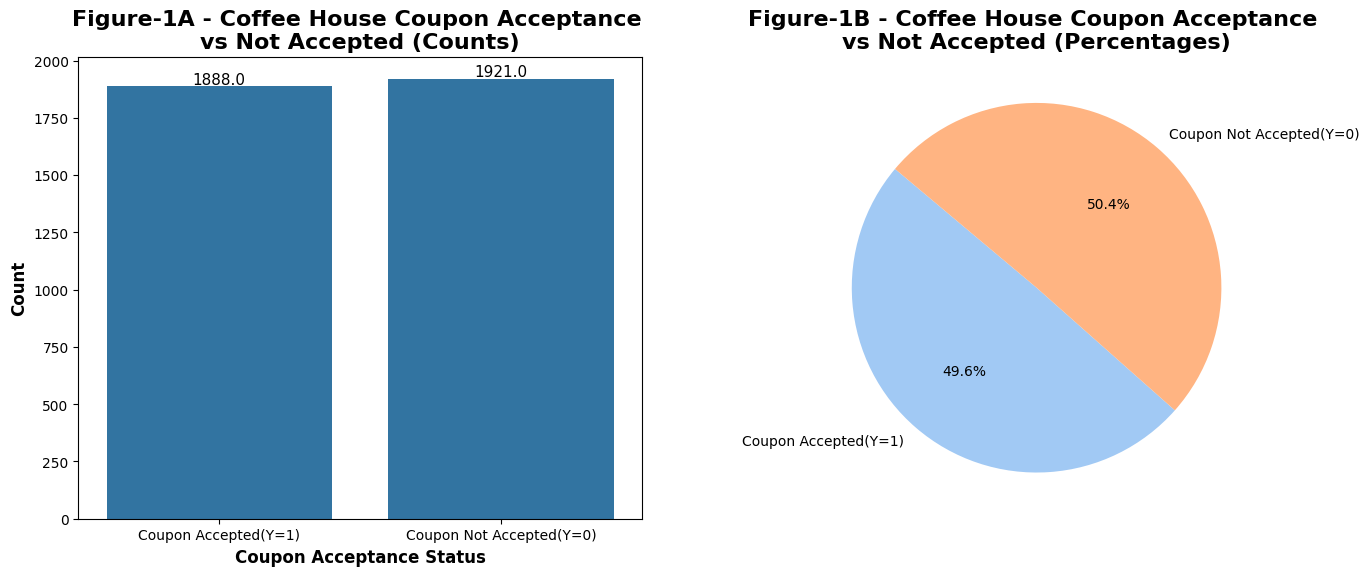

In [18]:
# Acceptance statistics for df_coffee
total = len(df_coffee)
accept_count = df_coffee['Y'].sum()
accept_pct = accept_count / total * 100 if total else 0
not_accepted_count = total - accept_count
not_accepted_pct = not_accepted_count / total * 100 if total else 0
print(f'Total Coffee Coupons: {total}\nCoffee Coupons Accepted: {accept_count} ({accept_pct:.1f}%)\nCoffee Coupons Not Accepted: {not_accepted_count} ({not_accepted_pct:.1f}%)\n')
# plot accepted vs not accepted count and percentage as subplots in the same chart
labels = ['Coupon Accepted(Y=1)', 'Coupon Not Accepted(Y=0)']
counts = [accept_count, not_accepted_count]
percentages = [accept_pct, not_accepted_pct]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
# Bar plot for counts
sns.barplot(x=labels, y=counts, ax=ax1)
ax1.set_title('Figure-1A - Coffee House Coupon Acceptance \nvs Not Accepted (Counts)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Coupon Acceptance Status', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')
# Pie plot for percentages
colors = sns.color_palette('pastel')[0:2]
ax2.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax2.set_title('Figure-1B - Coffee House Coupon Acceptance \nvs Not Accepted (Percentages)', fontsize=16, fontweight='bold')
plt.savefig('images/ind_investigation/Figure-Coffee-1A-1B.png')
plt.show()

**Findings:** 
- The dataset has 33 (~0.87%) more rejections than acceptance for Coffee House coupons.
- The split is nearly even - There is no strong overall preference for accepting or rejecting coffee house coupons. 
- Further subgroup analysis is needed to identify any segments with meaningful differences.

**2. Coffee House Coupon Acceptance Statistics by Passenger Type**

The following section provides the acceptance rates for 'Coffee House' coupons, segmented by passenger type.



Coupon Acceptance Summary by Passenger Type:

           Total Coupon Count  Accepted Coupon Count  Accepted Coupon Percentage  Not Accepted Coupon Count  Not Accepted Coupon Percentage
passanger                                                                                                                                  
Friend(s)                1173                    700                       59.68                        473                           40.32
Partner                   290                    164                       56.55                        126                           43.45
Kid(s)                    192                     90                       46.88                        102                           53.12
Alone                    2154                    934                       43.36                       1220                           56.64


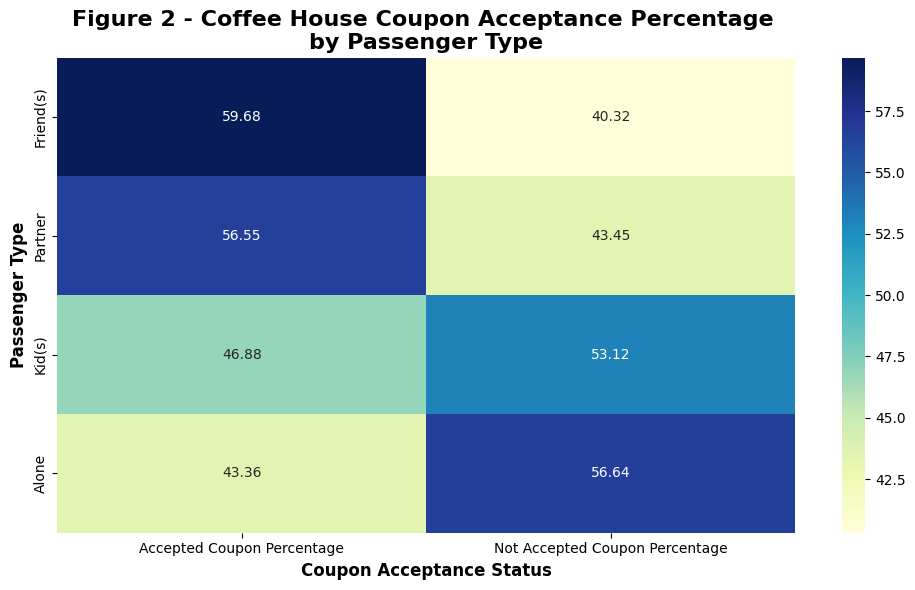

In [19]:
# summary of coupon acceptance and not accepted by passenger type  
coupon_status_passenger_summary = df_coffee.groupby('passanger')['Y'].agg(count='size', accepted='sum')
coupon_status_passenger_summary['accept_pct'] = coupon_status_passenger_summary['accepted'] / coupon_status_passenger_summary['count'] * 100
coupon_status_passenger_summary = coupon_status_passenger_summary.sort_values('accept_pct', ascending=False)
coupon_status_passenger_summary['not_accepted'] = coupon_status_passenger_summary['count'] - coupon_status_passenger_summary['accepted']
coupon_status_passenger_summary['not_accepted_pct'] = coupon_status_passenger_summary['not_accepted'] / coupon_status_passenger_summary['count'] * 100  
# renaming columns for better readability
coupon_status_passenger_summary = coupon_status_passenger_summary.rename(columns={
    'count': 'Total Coupon Count',
    'accepted': 'Accepted Coupon Count',
    'accept_pct': 'Accepted Coupon Percentage',
    'not_accepted': 'Not Accepted Coupon Count',
    'not_accepted_pct': 'Not Accepted Coupon Percentage'
})
# round percentage columns to 2 decimal places
coupon_status_passenger_summary['Accepted Coupon Percentage'] = coupon_status_passenger_summary['Accepted Coupon Percentage'].round(2)
coupon_status_passenger_summary['Not Accepted Coupon Percentage'] = coupon_status_passenger_summary['Not Accepted Coupon Percentage'].round(2)
# print coupon_status_passenger_summary in a formatted way
print("\nCoupon Acceptance Summary by Passenger Type:\n")
print(coupon_status_passenger_summary.to_string()) 
# plot a heatmap to visualize the acceptance percentage by passenger type
plt.figure(figsize=(10,6))
sns.heatmap(coupon_status_passenger_summary[['Accepted Coupon Percentage', 'Not Accepted Coupon Percentage']], annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Figure 2 - Coffee House Coupon Acceptance Percentage \nby Passenger Type', fontsize=16, fontweight='bold')
plt.xlabel('Coupon Acceptance Status', fontsize=12, fontweight='bold')
plt.ylabel('Passenger Type', fontsize=12, fontweight='bold')
plt.tight_layout() 
plt.savefig('images/ind_investigation/Figure-Coffee-2.png')
plt.show()

**Findings:** 
- The heatmap visualizes acceptance and non-acceptance percentages for each passenger type (Friend(s), Alone, Kid(s), Partner).
- It reveals that acceptance rates are not identical across passenger types — some passenger groups accept coffee-house coupons at higher rates than others.

**3. Coffee House Coupon Acceptance Statistics for passenger type and coffee house visit frequency**

The following section shows a statistical analysis of coupon redemption rates based on passenger type and the frequency of monthly coffee house visits.

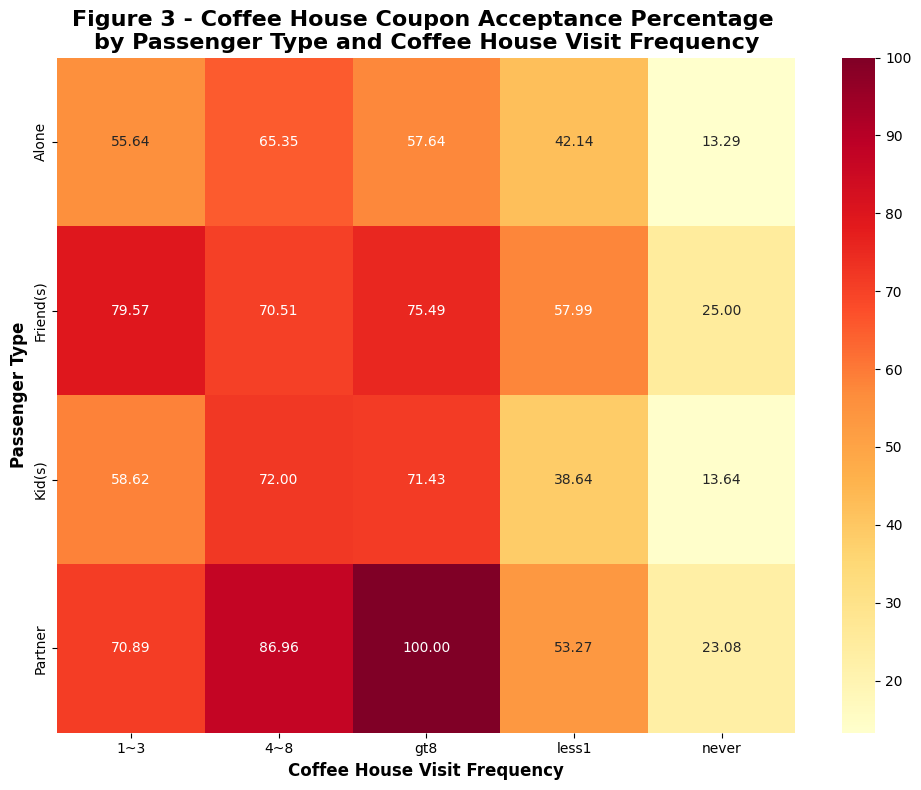

In [20]:
# Calculate acceptance percentages for each passenger type based on 'CoffeeHouse' visit frequency
acceptance_summary = df_coffee.groupby(['passanger', 'CoffeeHouse'])['Y'].agg(count='size', accepted='sum')
acceptance_summary['accept_pct'] = acceptance_summary['accepted'] / acceptance_summary['count'] * 100
acceptance_summary = acceptance_summary.reset_index()
# Pivot the data for better visualization
acceptance_pivot = acceptance_summary.pivot(index='passanger', columns='CoffeeHouse', values='accept_pct')
# Plot a heatmap to visualize acceptance percentages
plt.figure(figsize=(10,8))
sns.heatmap(acceptance_pivot, annot=True, fmt=".2f", cmap='YlOrRd')
plt.title('Figure 3 - Coffee House Coupon Acceptance Percentage \nby Passenger Type and Coffee House Visit Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Coffee House Visit Frequency', fontsize=12, fontweight='bold')
plt.ylabel('Passenger Type', fontsize=12, fontweight='bold')
plt.tight_layout() 
plt.savefig('images/ind_investigation/Figure-Coffee-3.png')
plt.show()

**Findings:** 

- Positive frequency effect: Acceptance percentage generally increases with CoffeeHouse visit frequency. Rows for '4~8' and 'gt8' show higher acceptance rates than 'never', 'less1', or '1~3'.
- Drivers who travel with 'Partner' exhibit the strongest acceptance at higher visit frequencies — this segment is the most responsive to coffee-house coupons when they already visit often.
- Drivers who travel with 'Friend(s)' show moderate acceptance; they respond mainly when visit frequency is high.
- Drivers who travel with 'Kid(s)' consistently show the lowest acceptance rates across frequencies.
- Passenger type modifies the frequency effect — i.e., being a frequent visitor matters more for some passenger types (Partner) than others.

**4. Coffee House Coupon Acceptance Statistics for each passenger type and destination of travel.**

The following section shows a statistical analysis of coupon redemption rates based on passenger type and their destination of travel.


Coffee House Coupon Acceptance Summary by Passenger Type and Destination:

  Passenger Type      Destination  Total Coupon Count  Accepted Coupon Count  Accepted Coupon Percentage
0          Alone             Home                 832                    292                       35.10
5        Partner             Home                  54                     29                       53.70
1          Alone  No Urgent Place                 447                    257                       57.49
3      Friend(s)  No Urgent Place                1173                    700                       59.68
4         Kid(s)  No Urgent Place                 192                     90                       46.88
6        Partner  No Urgent Place                 236                    135                       57.20
2          Alone             Work                 875                    385                       44.00


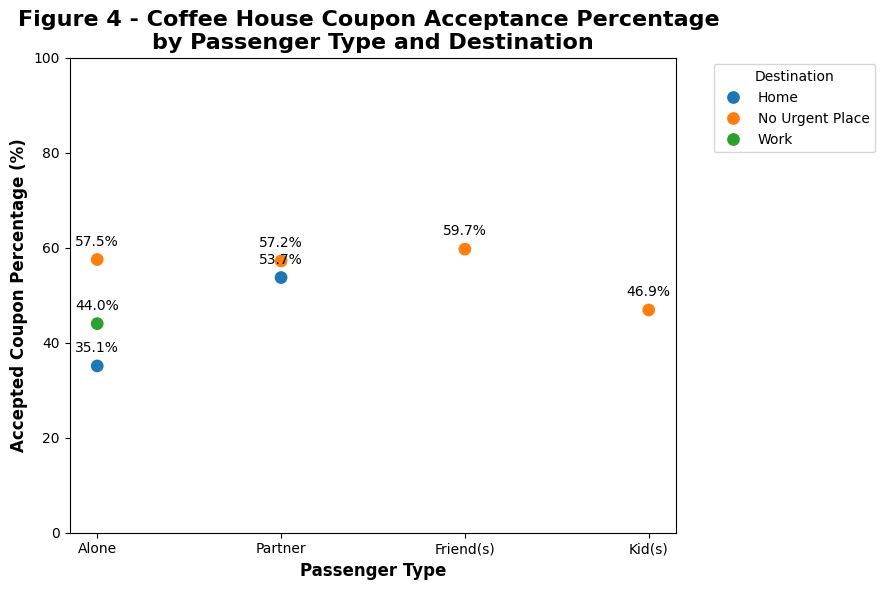

In [21]:
# use query to filter df_coffee for groups based on destination for each passanger type and calculate acceptance percentages for each group
group_passenger_destination = df_coffee.groupby(['passanger', 'destination'])['Y'].agg(count='size', accepted='sum')
group_passenger_destination['accept_pct'] = group_passenger_destination['accepted'] / group_passenger_destination['count'] * 100
group_passenger_destination = group_passenger_destination.reset_index()
group_passenger_destination = group_passenger_destination.sort_values(by=['destination', 'passanger'])
# renaming columns for better readability
group_passenger_destination = group_passenger_destination.rename(columns={
    'passanger': 'Passenger Type',
    'destination': 'Destination',
    'count': 'Total Coupon Count',
    'accepted': 'Accepted Coupon Count',
    'accept_pct': 'Accepted Coupon Percentage'
})
# round acceptance percentage to 2 decimal places
group_passenger_destination['Accepted Coupon Percentage'] = group_passenger_destination['Accepted Coupon Percentage'].round(2)  
# print the summary in a formatted way
print("\nCoffee House Coupon Acceptance Summary by Passenger Type and Destination:\n")
print(group_passenger_destination.to_string())
plt.figure(figsize=(9,6))
sns.scatterplot(data=group_passenger_destination, x='Passenger Type', y='Accepted Coupon Percentage', hue='Destination', s=100)
plt.title('Figure 4 - Coffee House Coupon Acceptance Percentage \nby Passenger Type and Destination', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Type', fontsize=12, fontweight='bold')
plt.ylabel('Accepted Coupon Percentage (%)', fontsize=12, fontweight='bold')
plt.ylim(0, 100)
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
for i in range(len(group_passenger_destination)):
    row = group_passenger_destination.iloc[i]
    plt.gca().annotate(f"{row['Accepted Coupon Percentage']:.1f}%", 
                       (row['Passenger Type'], row['Accepted Coupon Percentage']),
                       textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='black')  
plt.tight_layout() 
plt.savefig('images/ind_investigation/Figure-Coffee-4.png')
plt.show()

**Findings:** 
- Figure 4 shows that acceptance rates vary meaningfully by passenger type and destination.
- Passenger segments with higher baseline coffee-house frequency (e.g., Partners) tend to show higher accept rates when their destination aligns with discretionary stops.
- Some passenger/destination combinations show high accept rates but low counts — these may be noisy or not generalizable.

**5. Coffee House Coupon Acceptance Statistics for each passenger type and direction of travel.**

The following section shows a statistical analysis of coupon redemption rates based on passenger type and their direction of travel.

Distinct values in 'direction' column of df_coffee_direction: ['Opposite' 'Same']

Counts of distinct values in 'direction' column of df_coffee_direction:
direction
Opposite    3094
Same         715
Name: count, dtype: int64


Coffee House Coupon Acceptance Summary by Passenger Type and Direction:

   passanger direction  count  accepted  accept_pct
0      Alone  Opposite   1493       587   39.316812
1      Alone      Same    661       347   52.496218
2  Friend(s)  Opposite   1173       700   59.676044
3     Kid(s)  Opposite    192        90   46.875000
4    Partner  Opposite    236       135   57.203390
5    Partner      Same     54        29   53.703704


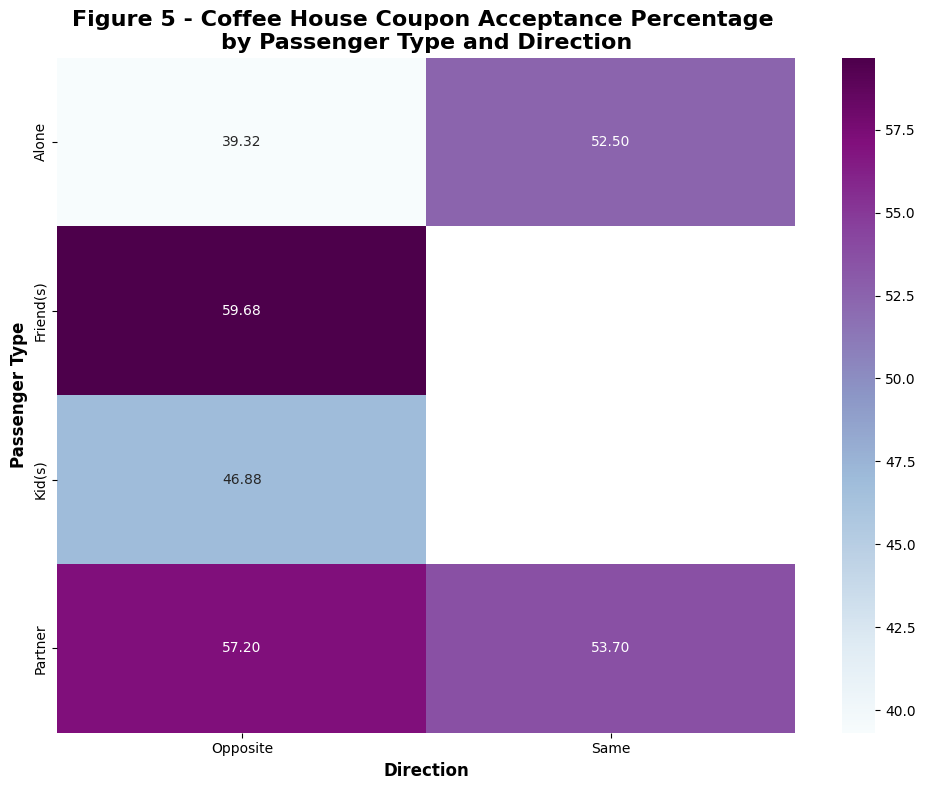

In [22]:
# created a new dataframe called df_coffee_direction by copying df_coffee for safe working
df_coffee_direction = df_coffee.copy()
# created a new column 'direction' based on the 'direction_same' and 'direction_opp' columns
def determine_direction(row):
    if row['direction_same'] == 1:
        return 'Same'
    elif row['direction_opp'] == 1:
        return 'Opposite'
    else:
        return 'No Direction Info'
df_coffee_direction['direction'] = df_coffee_direction.apply(determine_direction, axis=1)
# count distinct values in the new 'direction' column
distinct_direction_values = df_coffee_direction['direction'].unique()
print(f"Distinct values in 'direction' column of df_coffee_direction: {distinct_direction_values}\n")
# count the distinct values in the 'direction' column
direction_counts = df_coffee_direction['direction'].value_counts()
print(f"Counts of distinct values in 'direction' column of df_coffee_direction:\n{direction_counts}\n")
# Calculate acceptance percentages for each passenger type based on 'direction' column
acceptance_summary_direction = df_coffee_direction.groupby(['passanger', 'direction'])['Y'].agg(count='size', accepted='sum')
acceptance_summary_direction['accept_pct'] = acceptance_summary_direction['accepted'] / acceptance_summary_direction['count'] * 100
acceptance_summary_direction = acceptance_summary_direction.reset_index()
#print acceptance summary for verification
print("\nCoffee House Coupon Acceptance Summary by Passenger Type and Direction:\n")
print(acceptance_summary_direction.to_string())
# Pivot the data for better visualization
acceptance_pivot_direction = acceptance_summary_direction.pivot(index='passanger', columns='direction', values='accept_pct')
# Plot a heatmap to visualize acceptance percentages
plt.figure(figsize=(10,8))
sns.heatmap(acceptance_pivot_direction, annot=True, fmt=".2f", cmap='BuPu')
plt.title('Figure 5 - Coffee House Coupon Acceptance Percentage \nby Passenger Type and Direction', fontsize=16, fontweight='bold')
plt.xlabel('Direction', fontsize=12, fontweight='bold')
plt.ylabel('Passenger Type', fontsize=12, fontweight='bold')
plt.tight_layout() 
plt.savefig('images/ind_investigation/Figure-Coffee-5.png')
plt.show()


**Findings:** 
- For Drivers traveling with partner, the coffee coupon acceptance rate does not change much with the direction of travel but the acceptance rate is high compared to other passenger types.
- For Drivers traveling alone, the coffee coupon acceptance rate increases when the coffee house is in the same direction of travel.
- Based on the data, the drivers who are traveling alone or with a partner give the best fit for routine coffee coupons.

**6. Coffee House Coupon Acceptance Statistics for each passenger type based on destination and direction of travel.**

The following section shows a statistical analysis of coupon redemption rates based on passenger type, their destination and their direction of travel.


Coffee House Coupon Acceptance Summary by Passenger Type, Destination, and Direction:

  Passenger Type      Destination Direction  Total Coupon Count  Accepted Coupon Count  Accepted Coupon Percentage
0          Alone             Home  Opposite                 575                    175                       30.43
1          Alone             Home      Same                 257                    117                       45.53
7        Partner             Home      Same                  54                     29                       53.70
2          Alone  No Urgent Place  Opposite                 447                    257                       57.49
5      Friend(s)  No Urgent Place  Opposite                1173                    700                       59.68
6         Kid(s)  No Urgent Place  Opposite                 192                     90                       46.88
8        Partner  No Urgent Place  Opposite                 236                    135                     

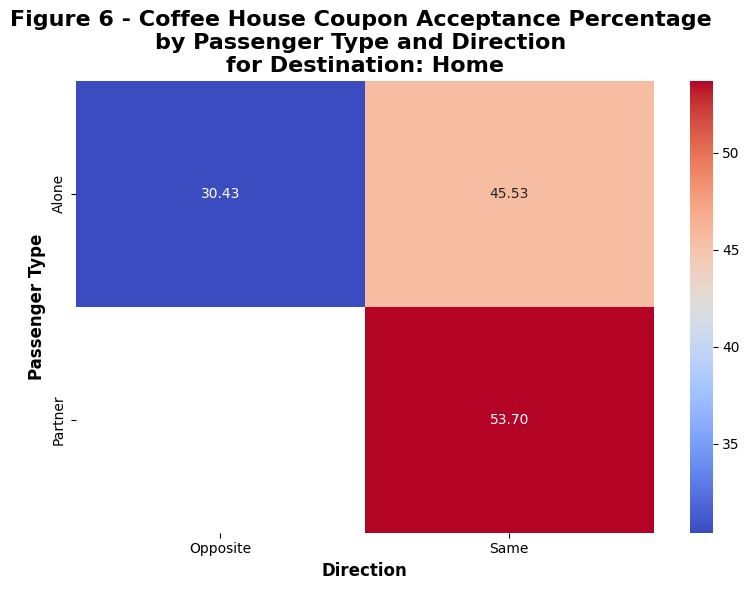

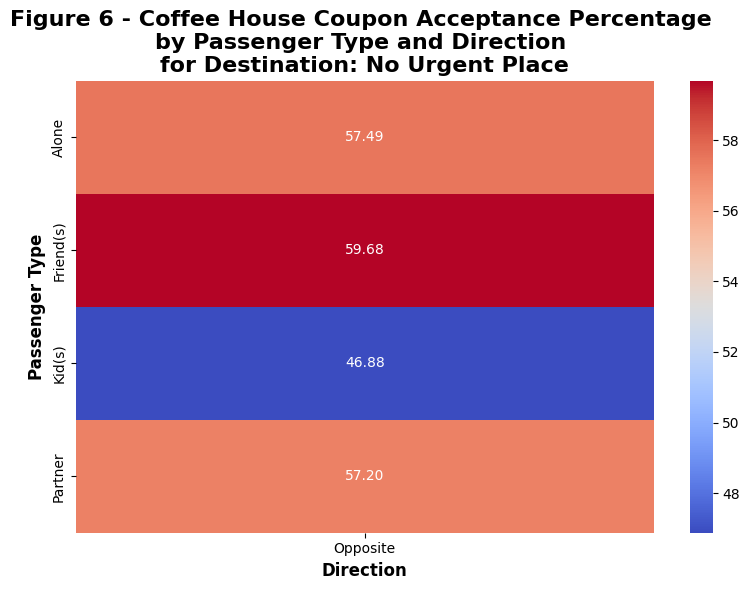

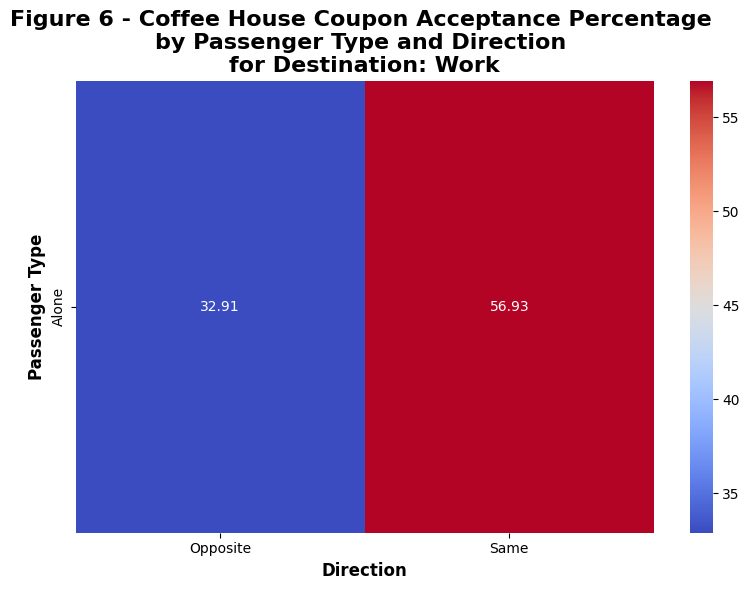

In [23]:
# Analyze coupon acceptance rate based on direction for each passenger type and destination
group_passenger_destination_direction = df_coffee_direction.groupby(['passanger', 'destination', 'direction'])['Y'].agg(count='size', accepted='sum')
group_passenger_destination_direction['accept_pct'] = group_passenger_destination_direction['accepted'] / group_passenger_destination_direction['count'] * 100
group_passenger_destination_direction = group_passenger_destination_direction.reset_index()
# order by destination, direction, and passanger
group_passenger_destination_direction = group_passenger_destination_direction.sort_values(by=['destination', 'direction', 'passanger'])
# renaming columns for better readability
group_passenger_destination_direction = group_passenger_destination_direction.rename(columns={
    'passanger': 'Passenger Type',
    'destination': 'Destination',
    'direction': 'Direction',
    'count': 'Total Coupon Count',
    'accepted': 'Accepted Coupon Count',
    'accept_pct': 'Accepted Coupon Percentage'
})
# round acceptance percentage to 2 decimal places
group_passenger_destination_direction['Accepted Coupon Percentage'] = group_passenger_destination_direction['Accepted Coupon Percentage'].round(2)  
# print the summary in a formatted way
print("\nCoffee House Coupon Acceptance Summary by Passenger Type, Destination, and Direction:\n")
print(group_passenger_destination_direction.to_string())  
# plot heatmap matrix per destination to visualize acceptance percentages, pivot passenger x direction
for destination in group_passenger_destination_direction['Destination'].unique():
    subset = group_passenger_destination_direction[group_passenger_destination_direction['Destination'] == destination]
    acceptance_pivot_dest = subset.pivot(index='Passenger Type', columns='Direction', values='Accepted Coupon Percentage')
    plt.figure(figsize=(8,6))
    sns.heatmap(acceptance_pivot_dest, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Figure 6 - Coffee House Coupon Acceptance Percentage \nby Passenger Type and Direction \nfor Destination: {destination}', fontsize=16, fontweight='bold')
    plt.xlabel('Direction', fontsize=12, fontweight='bold')
    plt.ylabel('Passenger Type', fontsize=12, fontweight='bold')
    plt.tight_layout() 
    plt.savefig(f'images/ind_investigation/Figure-Coffee-6-{destination}.png')
    plt.show()  
    # End of analysis for Coffee House coupons

**Findings:** 
- Acceptance is generally higher when the coffee shop is on the Same route versus Opposite — route convenience increases redemption likelihood
- Alone and Partner groups show the highest acceptance percentages; trips with Kid(s) show the lowest acceptance.
- Destination meaningfully shifts acceptance — some destinations (no-urgent destinations) are associated with higher acceptance across passenger types.
- Several plotted points likely derive from small sample sizes, so some percentage differences may be noisy.

### **Hypotheses on Coffee House Coupon Acceptance**

**Primary Hypothesis:**
- Coupon acceptance increases when the coffee shop lies on the same route as the trip (direction = Same) because convenience reduces the marginal cost (time/effort) of redeeming the coupon.
Behavioral & Demographic Hypotheses:

- Drivers who travel Alone or with a Partner are more likely to accept immediate coffee-house coupons; trips with Kid(s) have lower acceptance due to logistics, priorities, or time constraints.
- Higher historical CoffeeHouse visit frequency (e.g., 4~8, gt8) predicts higher acceptance — coupons act as reminders for people who already exhibit the behavior.

**Situational Hypotheses:**
- Acceptance is higher for discretionary destinations (no-urgent-destination / errands) than for tightly scheduled destinations like work or home. 
- The advantage of Same direction is amplified for certain passenger types (notably Partner) — i.e., partners respond especially well to on-route offers.
- Some high/low percentages are driven by small sample sizes in particular passenger×destination×direction cells and may not generalize.

**Marketing Hypotheses:**
- Route-aware targeting (send only when direction_same == 1) will increase redemption rate and reduce wasted impressions compared with blind distribution.
- For frequent visitors, low-value instant coupons perform well; for infrequent or family trips (with kids), higher-value or time-flexible offers may be required to shift behavior.
- Messages emphasizing convenience ("on your way") will be more effective than generic promotions.